In [1]:
# importing libraries
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

Original Image


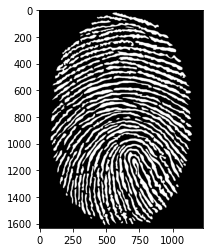

In [2]:
# reading an image
img = cv2.imread('Thumb.png', cv2.IMREAD_GRAYSCALE)
ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

print("Original Image")
plt.imshow(img, cmap="binary")

In [3]:
# Function for skeletonizing the image
def findSkeleton(im):
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    out = np.zeros(im.shape,np.uint8)

    flag = 0 
    while(not flag):
        eroded = cv2.erode(im, element)
        opened = cv2.dilate(eroded, element)
        opened = cv2.subtract(im,opened)
        out = cv2.bitwise_or(out,opened)
        im = eroded.copy()
        zeros = img.size - cv2.countNonZero(im)
        flag = 1 if (zeros == img.size) else 0
        
    return out

In [4]:
output = findSkeleton(img)

kernel = np.ones((3,3),np.uint8)
output = cv2.dilate(output,kernel)
output = cv2.medianBlur(output, 5)
ret,thresh = cv2.threshold(output,127,255,cv2.THRESH_BINARY_INV)

res = np.hstack((img, thresh))

cv2.imwrite("output.png", res)

True

Skeleton image


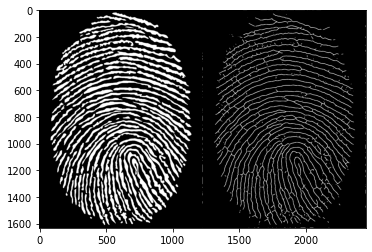

In [5]:
# Final Output
print("Skeleton image")
plt.imshow(res, cmap="binary")